In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
import pprint

In [32]:
data = pd.read_csv("../00_data/data_with_calc_fields.csv", sep=";", decimal=",", index_col="datetime")

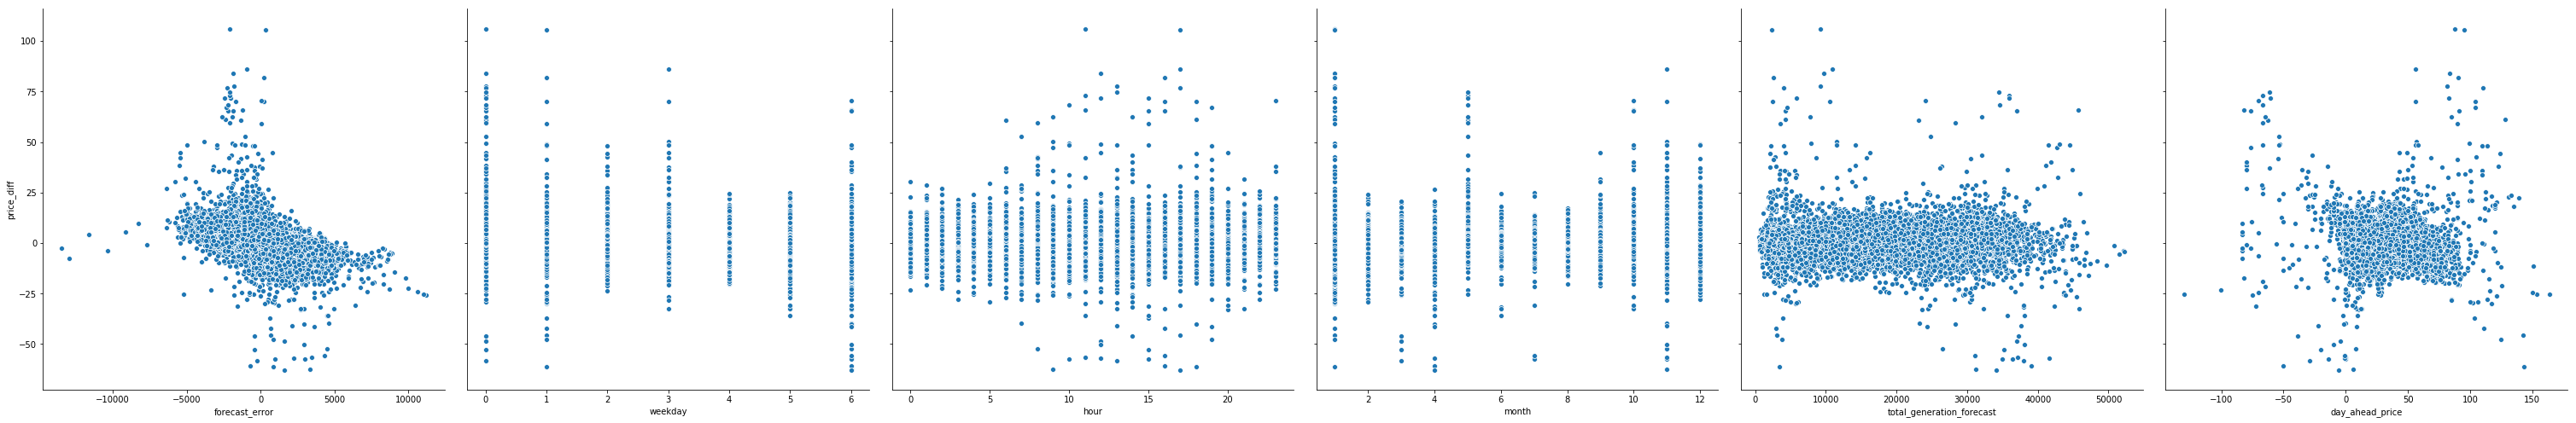

In [33]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=["forecast_error", "weekday", "hour", "month", "total_generation_forecast", "day_ahead_price"], y_vars=["price_diff"], height=7)

['weekday_1' 'weekday_2' 'weekday_3' 'weekday_4' 'weekday_5' 'weekday_6']


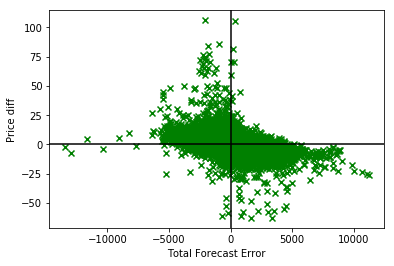

Intercept:  1.6888594551784166
[   ('forecast_error', -0.0018627040704791977),
    ('total_generation_forecast', 4.173582128896256e-05),
    ('weekday_1', -0.010861520957165027),
    ('weekday_2', -0.010861520957163927),
    ('weekday_3', -0.010861520957166082),
    ('weekday_4', -0.30936609722680614),
    ('weekday_5', -0.30936609722680375),
    ('weekday_6', -0.30936609722680286),
    ('month_2', -0.21336583951618626),
    ('month_3', -0.2133658395161876),
    ('month_4', -0.2133658395161876),
    ('month_5', -0.23784838729136307),
    ('month_6', -0.23784838729136293),
    ('month_7', -0.2378483872913631),
    ('month_8', -0.1841362970666147),
    ('month_9', -0.1841362970666144),
    ('month_10', -0.18413629706661433),
    ('month_11', -0.451962178837046),
    ('month_12', -0.45196217883704615)]
The R^2 of linear regression is:  0.21648694758384646
Lower right quadrant: Produced more than forecasted, intraday price lower than day ahead price.


In [40]:
hour_dummies = pd.get_dummies(data.hour, prefix='hour')
weekday_dummies = pd.get_dummies(data.weekday, prefix='weekday').iloc[:, 1:]
month_dummies = pd.get_dummies(data.month, prefix='month').iloc[:, 1:]
data = pd.concat([data, hour_dummies, weekday_dummies, month_dummies], axis=1)
weekday_dummy_names = weekday_dummies.columns.values
month_dummy_names = month_dummies.columns.values
hour_dummy_names = hour_dummies.columns.values
feature_cols = ["forecast_error", "total_generation_forecast"] + list(weekday_dummy_names) + list(month_dummy_names)
               # + list(hour_dummy_names) 
                
x = data[feature_cols]
y = data["price_diff"]

model = LinearRegression(fit_intercept =True)
reg = model.fit(x, y, 1)
model_pred = model.predict(data[feature_cols])

plt.scatter( data["forecast_error"] ,data["price_diff"], marker = 'x', c='g')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("Total Forecast Error")
plt.ylabel("Price diff")
plt.show()

pp = pprint.PrettyPrinter(indent=4)
print('Intercept: ', model.intercept_)
pp.pprint(list(zip(feature_cols, model.coef_)))
print ('The R^2 of linear regression is: ',r2_score(data["price_diff"], model_pred))
print("Lower right quadrant: Produced more than forecasted, intraday price lower than day ahead price.")

In [42]:
x = data["forecast_error"]
y = data["price_diff"]
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(x)
est = sm.OLS(y, x).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_diff   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     4348.
Date:                Wed, 19 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:51:56   Log-Likelihood:                -56663.
No. Observations:               17542   AIC:                         1.133e+05
Df Residuals:                   17541   BIC:                         1.133e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
forecast_error    -0.0018   2.79e-05    -65.940      0.000      -0.002      -0.002
==============================================================================
Omnibus:                    11048.608   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1157897.027
Skew:                           2.149   Prob(JB):                         0.00
Kurtosis:                      42.569   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""